
***
***

# R2.07
## TP4. MST
***
***

In this practical, all graphs will be unoriented

***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

We recall a few useful functions


In [2]:
W=np.array([
 [0     , 2.5   , 1     , np.inf, np.inf, .5    , .5     , 3      ],
 [ 2.5  , 0     , 1.5   , np.inf, 2     , 8     , np.inf ,np.inf  ],
 [  1   , 1.5   , 0     , np.inf, np.inf, np.inf, np.inf ,np.inf  ],
 [np.inf, np.inf, np.inf, 0     ,  1    , np.inf , 5     , np.inf ],
 [np.inf, 2     , np.inf, 1     ,  0    , np.inf, 5      , np.inf ],
 [.5    , 8     , np.inf, np.inf, np.inf, 0     , 1      , 2 ],
 [.5    , np.inf, np.inf, 5     , 5     , 1     , 0      , np.inf ],
 [3     , np.inf, np.inf, np.inf, np.inf, 2     , np.inf ,0       ]])


def ToAdj(W,loop=False):
    """
    Converts a weight matrix to the (most plausible) corresponding adjacency matrix
    
    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: a adjacency matrix
    :rtype: two dimensionnal numpy array
    
    """
    A=np.copy(W)
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if W[i][j]==np.inf:
                A[i][j]=0
            else :
                if W[i][j]==0:
                    if i!=j:
                        A[i][j]=1
                        print("Warning: a weight is equal to 0")
                    else : 
                        if loop :
                            A[i][j]=1
                        else :
                            A[i][j]=0


                else :
                    A[i][j]=1

    return A

def ToWeight(A):
    """
    Converts an  adjacency matrix to the corresponding weight matrix
    
    :param A: adjacency matrix
    :type A: two dimensionnal numpy array
    :return:  weight matrix 
    :rtype: two dimensionnal numpy array
    
    """
    n=A.shape[0]
    W=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if A[i][j]==0:
                W[i][j]=np.inf
            else :
                W[i][j]=1

    return W

print(W)
A=ToAdj(W)

print(A)

[[0.  2.5 1.  inf inf 0.5 0.5 3. ]
 [2.5 0.  1.5 inf 2.  8.  inf inf]
 [1.  1.5 0.  inf inf inf inf inf]
 [inf inf inf 0.  1.  inf 5.  inf]
 [inf 2.  inf 1.  0.  inf 5.  inf]
 [0.5 8.  inf inf inf 0.  1.  2. ]
 [0.5 inf inf 5.  5.  1.  0.  inf]
 [3.  inf inf inf inf 2.  inf 0. ]]
[[0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]]


(Weighted)Graph drawing

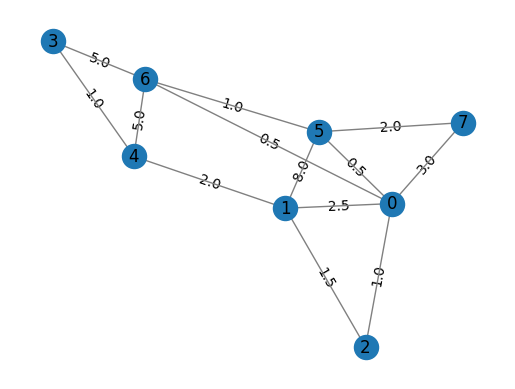

In [3]:
G=nx.from_numpy_array(A)



edges = G.edges()



for u,v in G.edges():
    G[u][v]['weight'] = W[u][v]

# Visualization with edge weights
weights = nx.get_edge_attributes(G, 'weight')
pos=nx.spring_layout(G)

# Visualization with edge widths equal to edge weights
#width = [weights[e] for e in G.edges()]
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw(G, pos, edge_color = 'grey',with_labels=True)




### Minimul spanning trees
***
**To Do:**

**_question 1_**

**a**  Write a function computing a list of edges, sorted by weight, from a weight matrix


A practical way to know if adding an edge induce a cycle is to create and update an array of connected component. Concretely, one starts with all vertices belonging to no connected component (represented by $-1$, then update the connected component using the following rules :


   - if we add 2 vertices that are not in a connected component yet, asign them to a new connected component
   - if 1 of the two already belong to a connected component $C$, then add the other vertex to $C$
   - if the 2 belong to different components $C$ and $C'$, then put all the vertices of $C'$ in $C$
   - if the 2 belong to the same components $C$, then the edge would create a cycle and therefor should not be added


**b** Write a function computing a minimum spanning tree of a graph given its weight matrix by Kruskal algorithm.




In [4]:
def weightToList(W):
    """
     Return the list of edges sorted by weight

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return:  the list of edges sorted by weight
    :rtype:  list
    """    
    dimension = np.shape(W)
    L = []
    for i in range(dimension[1]):
        for j in range(dimension[0]):
            if(W[i][j] != 0 and W[i][j] != np.inf):
                L.append(W[i][j])
    L.sort(reverse = True)

    return L


print(weightToList(W))

[8.0, 8.0, 5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 2.5, 2.5, 2.0, 2.0, 2.0, 2.0, 1.5, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5]


In [5]:
def weightToList(W):
    """
    Return the list of edges sorted by weight.

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return:  the list of edges sorted by weight
    :rtype:  list
    """    
    dimension = np.shape(W)
    L = []
    for i in range(dimension[1]):
        for j in range(dimension[0]):
            if W[i][j] != 0 and W[i][j] != np.inf:
                L.append((W[i][j], i, j))
    L.sort(reverse = True)

    return L

def Kruskal(W):
    """
    Return the MST (adjacency and weight matrices) given a weight matrix.

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return T:  the adjacency and weight matrix of the MST
    :rtype: 2  two dimensional square numpy arrays
    """
                
    T = np.zeros((W.shape[0], W.shape[0]))
    WT = np.ones((W.shape[0], W.shape[0])) * np.inf

    L = weightToList(W)
    cc = [-1 for i in range(W.shape[0])]
    
    cc_count = 0
    while len(set(cc)) > 1:
        edge = L.pop()
        weight, i, j = edge

        if cc[i] == -1 and cc[j] == -1:
            cc_count += 1
            cc[i] = cc[j] = cc_count
        elif cc[i] == -1:
            cc[i] = cc[j]
        elif cc[j] == -1:
            cc[j] = cc[i]
        elif cc[i] != cc[j]:
            old_cc = cc[j]
            for k in range(len(cc)):
                if cc[k] == old_cc:
                    cc[k] = cc[i]

        T[i][j] = T[j][i] = 1
        WT[i][j] = WT[j][i] = weight

    return T, WT

W = np.array([
 [0, 2.5, 1, np.inf, np.inf, .5, .5, 3],
 [2.5, 0, 1.5, np.inf, 2, 8, np.inf, np.inf],
 [1, 1.5, 0, np.inf, np.inf, np.inf, np.inf, np.inf],
 [np.inf, np.inf, np.inf, 0, 1, np.inf, 5, np.inf],
 [np.inf, 2, np.inf, 1, 0, np.inf, 5, np.inf],
 [.5, 8, np.inf, np.inf, np.inf, 0, 1, 2],
 [.5, np.inf, np.inf, 5, 5, 1, 0, np.inf],
 [3, np.inf, np.inf, np.inf, np.inf, 2, np.inf, 0]
])

T, WT = Kruskal(W)
print(T)


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
G=nx.from_numpy_array(A)

T,WT=Kruskal(W)


print(A,T,WT)
#edges = G.edges()
#À quoi ressemble edges ? (type, forme ...) 
#Il pourra être utile de convertir edges en np.array en écrivant
edges=np.array(G.edges)


colors=[T[u[0]][u[1]] for u in edges]
width=[1+WT[u[0]][u[1]] for u in edges]
#Que fait-on ici ?

print(colors,width)
nx.draw(G, pos=pos,edge_color=colors,width=width,with_labels=True)

: 


**__QUESTION_ 2_**

**a** Write an algorithm which takes as an input a weight matrix and set of edges $E$ and return the (sorted) list of edges such that one extremity is in $E$ and the other is not.

**b** Write a function computing a minimum spanning tree of a graph given its weight matrix by Prim algorithm.


In [ ]:
def outEdges(W,nodes):
    """
     Return the list of edges which have exactly one end in nodes, sorted by weight

    :param W: the weight matrix
    :type W: a two dimensional square numpy array
    :param nodes: a set of nodes
    :type nodes: set or array     
    :return:  list of edges which have exactly one end in nodes, sorted by weight
    :rtype:  list
    """     
    edges=[]
    

    return edges 
 
print(outEdges(W,{0})) 
 
 
 
def Prim(W,initial=0): 
 
    """ 
     Return the MST (adjacency and weight matrices) given a weight matrix

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return T:  the adjacency and weight matrix of the MST
    :rtype: 2  two dimensional square numpy arrays
    """

    T=np.zeros((W.shape[0],W.shape[0]))
    WT=np.zeros((W.shape[0],W.shape[0]))

    nodes={initial}  #data structure: set
    
    
    

    return T,WT 
    
Prim(W)

[[3.0, 0, 7], [2.5, 0, 1], [1.0, 0, 2], [0.5, 0, 6], [0.5, 0, 5]]


(array([[0., 0., 1., 0., 0., 1., 1., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]]),
 array([[0. , 0. , 1. , 0. , 0. , 0.5, 0.5, 0. ],
        [0. , 0. , 1.5, 0. , 2. , 0. , 0. , 0. ],
        [1. , 1.5, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
        [0. , 2. , 0. , 1. , 0. , 0. , 0. , 0. ],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 2. ],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. ]]))

[[0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]] [[0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]] [[0.  0.  1.  0.  0.  0.5 0.5 0. ]
 [0.  0.  1.5 0.  2.  0.  0.  0. ]
 [1.  1.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  2.  0.  1.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  2. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  2.  0.  0. ]]
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0] [1.0, 2.0, 1.5, 1.5, 1.0, 2.5, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0]


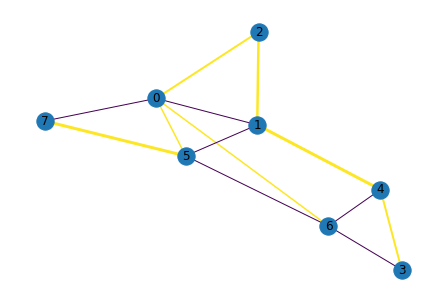

In [ ]:
G=nx.from_numpy_array(A)

T,WT=Prim(W)


print(A,T,WT)
edges = G.edges()
#À quoi ressemble edges ? (type, forme ...) 
#Il pourra être utile de convertir edges en np.array en écrivant
#edges=np.array(G.edges)


colors=[T[u[0]][u[1]] for u in edges]
width=[1+WT[u[0]][u[1]] for u in edges]
#Que fait-on ici ?

print(colors,width)
nx.draw(G, pos=pos,edge_color=colors,width=width,with_labels=True)